In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [33]:
# Import libraries

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import my_functions as func

In [34]:
"""
Main program

"""

char_dict = func.make_dict(func.load_results(), func.load_layout())

# save_dict(char_dict)

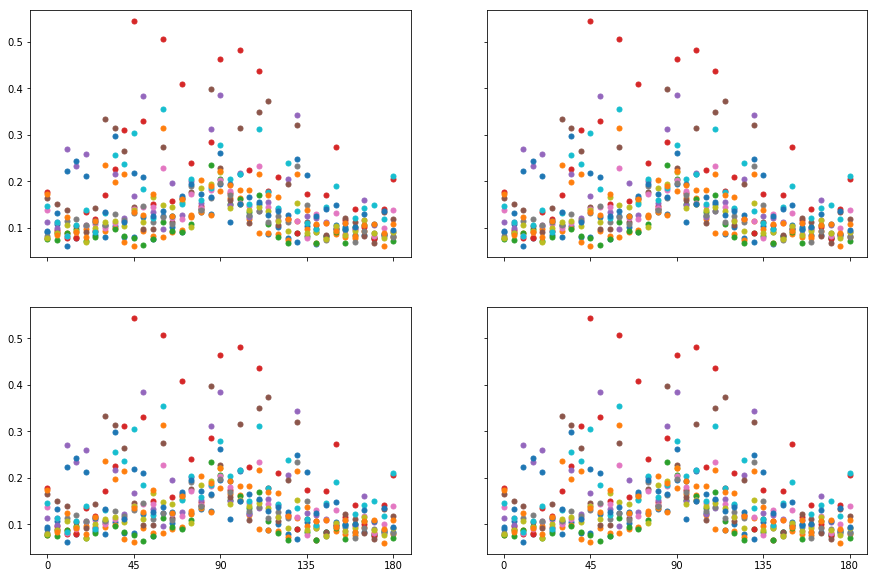

In [49]:
"""
Plot the error versus orientation of convex cylinders of diameters 4, 8, 16 and 24 mm.

NB! In progress!

"""

chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Pos']

dfs = func.df_from_dict(chars, char_dict)
dfs = func.exclude_values('angle', -90, dfs)
data = func.get_column(['error', 'angle', 'build'], dfs)

for i in range(len(data)):
    data[i] = data[i].groupby('build')


x_len = int(len(data)/2)
y_len = len(data) - x_len

fig, axs = plt.subplots(x_len, y_len, sharex = True, sharey=True, figsize=(15, 10))
axs[0, 0].set_xticks(range(0, 181, 45))

for i in range(len(data)):
    for name, group in data[i]:
        for j in range(int(len(data)/2)):
            for k in range(int(len(data)/2)):
                axs[j, k].plot(group.angle, group.error, marker='o', linestyle='', ms=5)

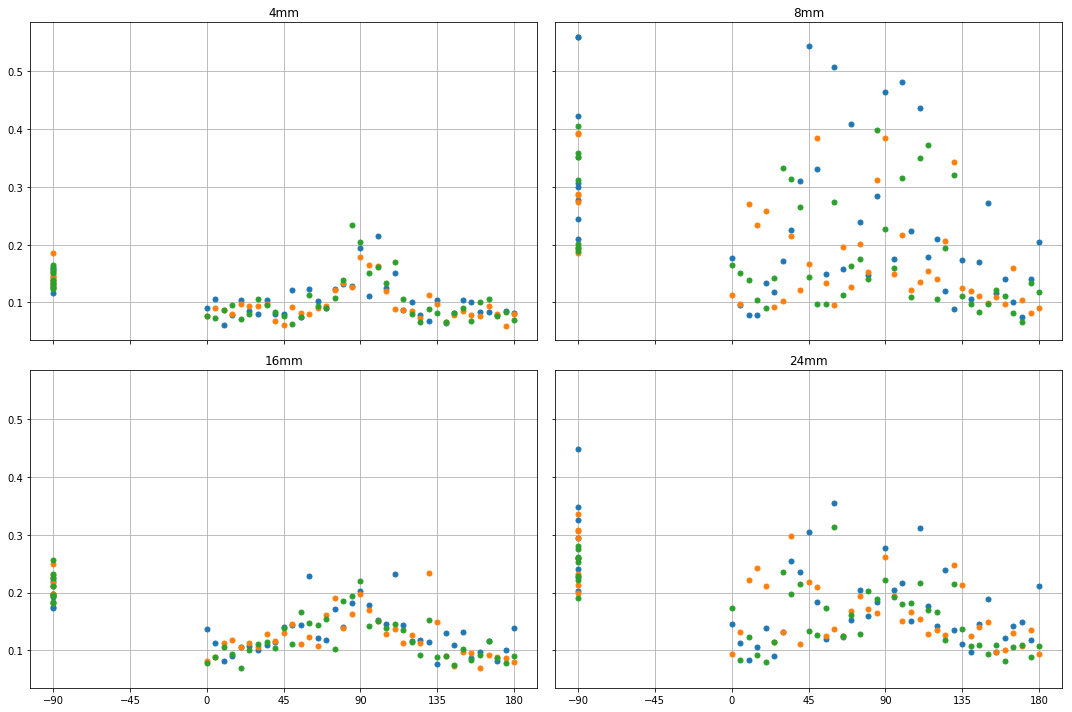

In [9]:
"""
Plot the error versus orientation of convex cylinders of diameters 4, 8, 16 and 24 mm.

"""

# Get relevant dataframes from the dictionary
df1 = char_dict['Cylindricity_Cyl_4mm_Pos']
df2 = char_dict['Cylindricity_Cyl_8mm_Pos']
df3 = char_dict['Cylindricity_Cyl_16mm_Pos']
df4 = char_dict['Cylindricity_Cyl_24mm_Pos']


# Group by build to enable separate colors of builds 1, 2 and 3
groups1 = df1.groupby('build')
groups2 = df2.groupby('build')
groups3 = df3.groupby('build')
groups4 = df4.groupby('build')


# Shared parameters (marker size and shape)
pnt_s = 5
mrk = 'o'


# Create figure of 2 by 2 plots sharing x and y axes
fig, axs = plt.subplots(2, 2, sharex = True, sharey=True, figsize=(15, 10))
axs[0, 0].set_xticks(range(-90, 181, 45))


# Set titles of the four plots
axs[0, 0].set_title("4mm")
axs[0, 1].set_title("8mm")
axs[1, 0].set_title("16mm")
axs[1, 1].set_title("24mm")


# Set grid for all four plots
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[1, 0].grid(True)
axs[1, 1].grid(True)


# Create four plots - one for each dimension
for name, group in groups1:
    axs[0, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="4mm")
    
for name, group in groups2:
    axs[0, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="8mm")

for name, group in groups3:
    axs[1, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="16mm")

for name, group in groups4:
    axs[1, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="24mm")

    
# Display plot
fig.tight_layout()
plt.show()

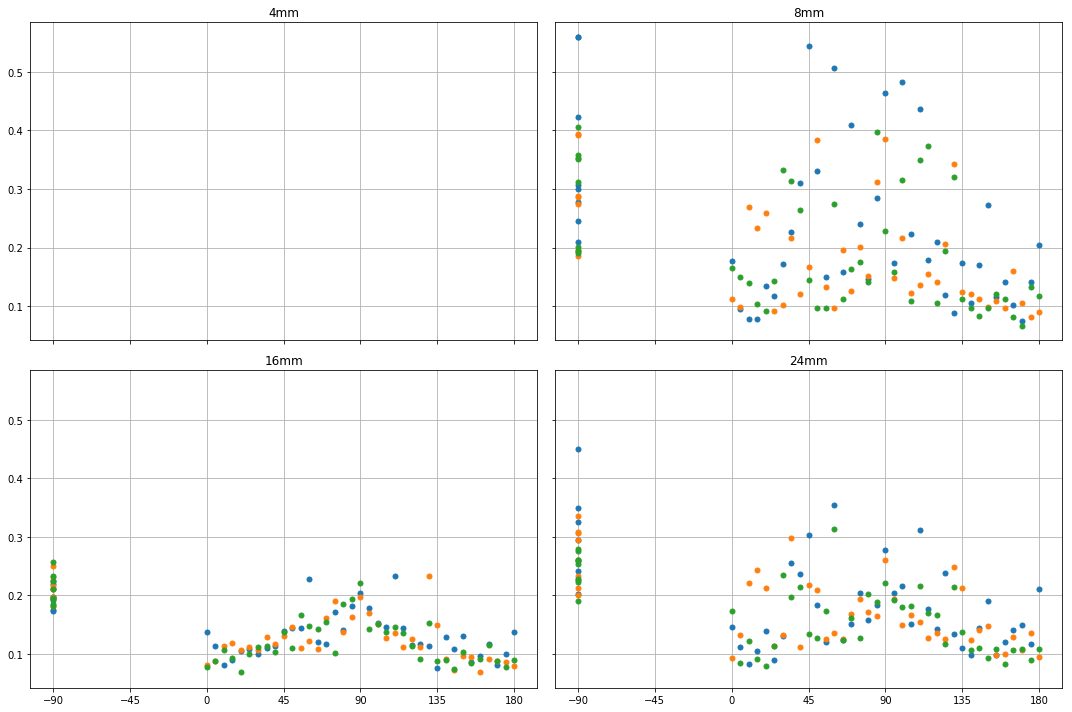

In [10]:
"""
Plot the error versus orientation of concave cylinders of diameters 8, 16 and 24 mm.

"""

# Get relevant dataframes from the dictionary
df2 = char_dict['Cylindricity_Cyl_8mm_Pos']
df3 = char_dict['Cylindricity_Cyl_16mm_Pos']
df4 = char_dict['Cylindricity_Cyl_24mm_Pos']


# Group by build to enable separate colors of builds 1, 2 and 3
groups2 = df2.groupby('build')
groups3 = df3.groupby('build')
groups4 = df4.groupby('build')


# Shared parameters (marker size and shape)
pnt_s = 5
mrk = 'o'


# Create figure of 2 by 2 plots sharing x and y axes
fig, axs = plt.subplots(2, 2, sharex = True, sharey=True, figsize=(15, 10))
axs[0, 0].set_xticks(range(-90, 181, 45))


# Set titles of the four plots
axs[0, 0].set_title("4mm")
axs[0, 1].set_title("8mm")
axs[1, 0].set_title("16mm")
axs[1, 1].set_title("24mm")


# Set grid for all four plots
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[1, 0].grid(True)
axs[1, 1].grid(True)


# Create four plots - one for each dimension
   
for name, group in groups2:
    axs[0, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="8mm")

for name, group in groups3:
    axs[1, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="16mm")

for name, group in groups4:
    axs[1, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="24mm")

    
# Display plot
fig.tight_layout()
plt.show()

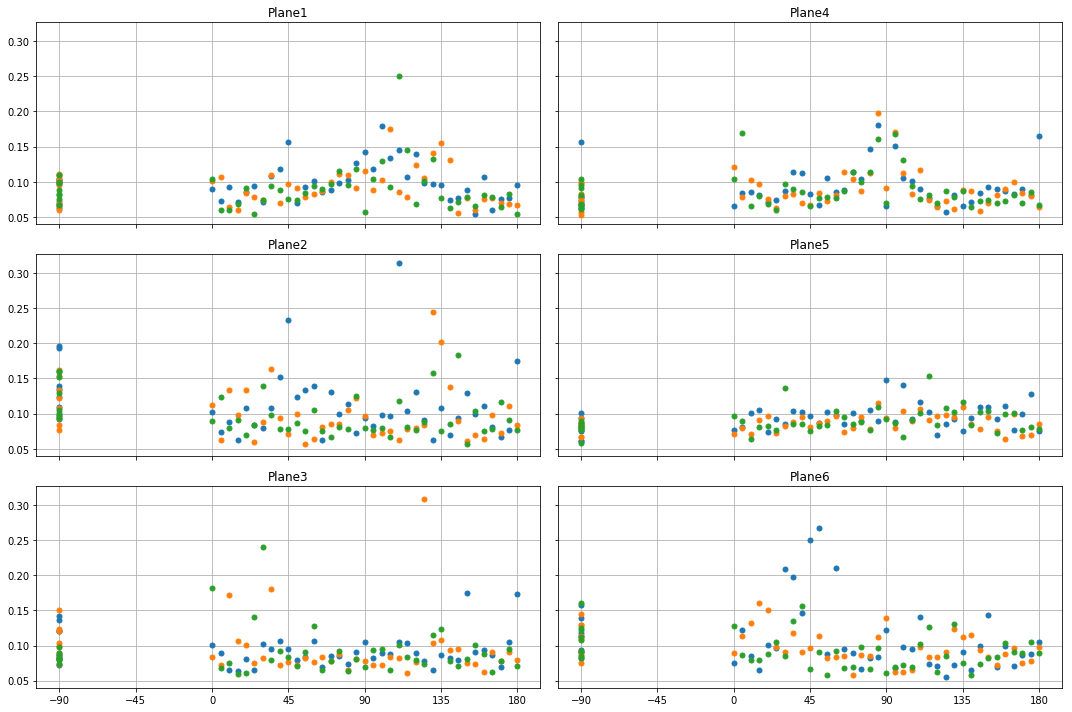

In [11]:
"""
Plot the error versus orientation of the planes at HX1.

"""

# Get relevant dataframes from the dictionary
df1 = char_dict['Flatness_HX1_Plane1']
df2 = char_dict['Flatness_HX1_Plane2']
df3 = char_dict['Flatness_HX1_Plane3']
df4 = char_dict['Flatness_HX1_Plane4']
df5 = char_dict['Flatness_HX1_Plane5']
df6 = char_dict['Flatness_HX1_Plane6']


# Group by build to enable separate colors of builds 1, 2 and 3
groups1 = df1.groupby('build')
groups2 = df2.groupby('build')
groups3 = df3.groupby('build')
groups4 = df4.groupby('build')
groups5 = df5.groupby('build')
groups6 = df6.groupby('build')


# Shared parameters (marker size and shape)
pnt_s = 5
mrk = 'o'


# Create figure of 3 by 2 plots sharing x and y axes
fig, axs = plt.subplots(3, 2, sharex = True, sharey=True, figsize=(15, 10))
axs[0, 0].set_xticks(range(-90, 181, 45))


# Set titles of the six plots
axs[0, 0].set_title("Plane1")
axs[0, 1].set_title("Plane4")
axs[1, 0].set_title("Plane2")
axs[1, 1].set_title("Plane5")
axs[2, 0].set_title("Plane3")
axs[2, 1].set_title("Plane6")


# Set grid for all six plots
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[1, 0].grid(True)
axs[1, 1].grid(True)
axs[2, 0].grid(True)
axs[2, 1].grid(True)


# Create six plots - one for each plane
for name, group in groups1:
    axs[0, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane1")
    
for name, group in groups2:
    axs[1, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane4")
    
for name, group in groups3:
    axs[2, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane2")
    
for name, group in groups4:
    axs[0, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane5")

for name, group in groups5:
    axs[1, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane3")

for name, group in groups6:
    axs[2, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane6")
    

# Display plot
fig.tight_layout()
plt.show()

In [13]:
"""
Insert a column with the angle between the plane surface and z-direction for all planes in all orientations.


"""

for i in range(1,3):
    for j in range(1,7):
        temp = char_dict['Flatness_HX{}_Plane{}'.format(i, j)]
        
        if i == 1:
            flat_rot = (210 + (j*60)) % 360
        else:
            flat_rot = (240 + (j*60)) % 360
        
        # Find the x and y components of the vector (unoriented)
        x = math.cos(math.radians(flat_rot))
        y = math.sin(math.radians(flat_rot))
        
        z_angles = []
        
        for angle in temp['angle']:
            z_angles.append(math.degrees(math.acos(y * math.sin(math.radians(angle)))))

            
        temp.insert(7, 'angle_z', z_angles, True)
        temp.insert(0, 'char', 'Flatness_HX{}_Plane{}'.format(i, j), True)
        
        if (i == 1 and j == 1):
            df_planes = temp
        else:
            df_planes = pd.concat([df_planes, temp])

In [ ]:
df_check = df_planes.loc[df_planes['angle'] == -90]

df_planes = df_planes[df_planes.angle != -90]

gb_check = df_check.groupby('build')


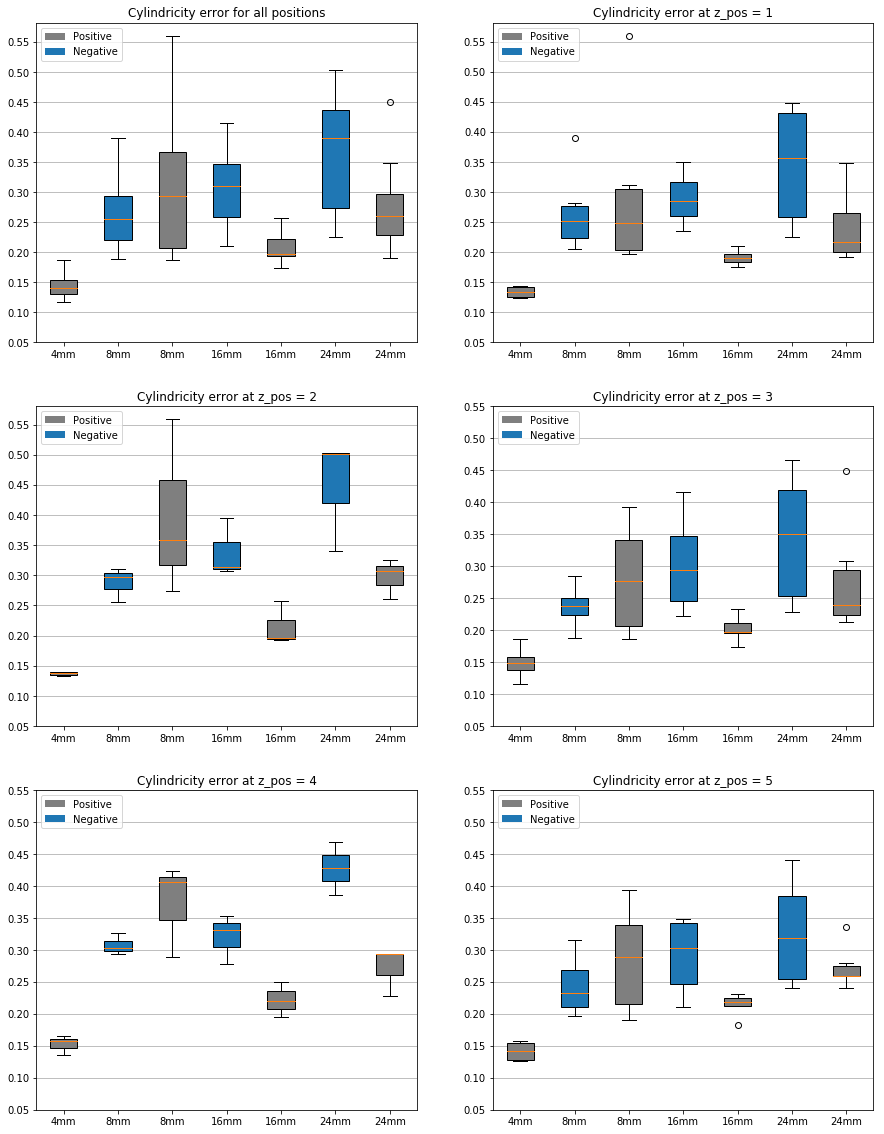

In [139]:
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

labels = ['4mm', '8mm', '8mm', '16mm', '16mm', '24mm', '24mm']

color1, color2 = 'tab:gray', 'tab:blue'

colors = [color1, color2, color1, color2, color1, color2, color1]

legend_elements = [Patch(facecolor=color1, label='Positive'),\
                  Patch(facecolor=color2, label='Negative')]

bplots = []

dfs = from_char_dict(chars, char_dict)
dfs = get_single_values('angle', -90, dfs)
data = [get_single_column('error', dfs)]


for i in range(1,6):
    data.append(get_single_column('error', get_single_values('z_pos', i, dfs)))

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))


for i in range(3):
    for j in range(2):
        bplots.append(axs[i, j].boxplot(data[(i*2)+j], patch_artist=True, labels=labels))
        axs[i, j].set_title("Cylindricity error at z_pos = {}".format((i*2)+j))
        axs[i, j].legend(handles=legend_elements, loc='upper left')
        axs[i, j].set_yticks([0.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55])
        axs[i, j].yaxis.grid(True)

for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
axs[0, 0].set_title("Cylindricity error for all positions")

plt.show()

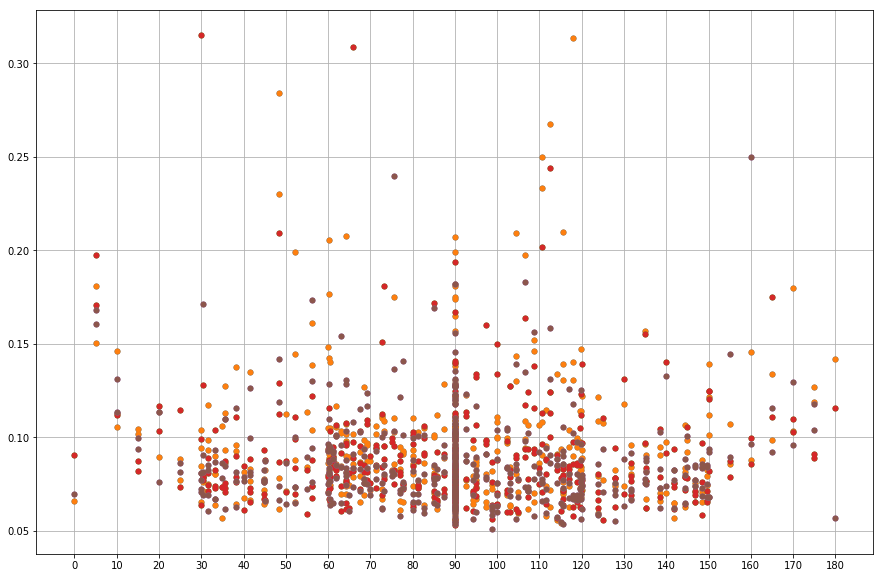

In [14]:
df_planes = df_planes[df_planes.angle != -90]

gb_planes = df_planes.groupby('build')

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_xticks(range(0, 181, 10))

ax.grid(True)

for name, group in gb_planes:
    ax.plot(group.angle_z, group.error, marker='o', linestyle='', ms=5)

# Display plot
plt.show()

In [ ]:
df_90 = df_planes.loc[df_planes['angle_z'] == 90]

In [ ]:
df_90.head()

In [ ]:
"""
Plot the error versus orientation of the planes at HX2.

"""

# Get relevant dataframes from the dictionary
df1 = char_dict['Flatness_HX2_Plane1']
df2 = char_dict['Flatness_HX2_Plane2']
df3 = char_dict['Flatness_HX2_Plane3']
df4 = char_dict['Flatness_HX2_Plane4']
df5 = char_dict['Flatness_HX2_Plane5']
df6 = char_dict['Flatness_HX2_Plane6']


# Group by build to enable separate colors of builds 1, 2 and 3
groups1 = df1.groupby('build')
groups2 = df2.groupby('build')
groups3 = df3.groupby('build')
groups4 = df4.groupby('build')
groups5 = df5.groupby('build')
groups6 = df6.groupby('build')


# Shared parameters (marker size and shape)
pnt_s = 5
mrk = 'o'


# Create figure of 3 by 2 plots sharing x and y axes
fig, axs = plt.subplots(3, 2, sharex = True, sharey=True, figsize=(15, 10))
axs[0, 0].set_xticks(range(-90, 181, 45))


# Set titles of the six plots
axs[0, 0].set_title("Plane1")
axs[0, 1].set_title("Plane4")
axs[1, 0].set_title("Plane2")
axs[1, 1].set_title("Plane5")
axs[2, 0].set_title("Plane3")
axs[2, 1].set_title("Plane6")


# Set grid for all six plots
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[1, 0].grid(True)
axs[1, 1].grid(True)
axs[2, 0].grid(True)
axs[2, 1].grid(True)


# Create six plots - one for each plane
for name, group in groups1:
    axs[0, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane1")
    
for name, group in groups2:
    axs[1, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane4")
    
for name, group in groups3:
    axs[2, 0].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane2")
    
for name, group in groups4:
    axs[0, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane5")

for name, group in groups5:
    axs[1, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane3")

for name, group in groups6:
    axs[2, 1].plot(group.angle, group.error, marker=mrk, linestyle='', ms=pnt_s, label="Plane6")
    

# Display plot
fig.tight_layout()
plt.show()

In [ ]:
df_layout = pd.read_csv("Data/leirmo_exp1_layout.csv", sep = ';', index_col = 'part_name')

df_test = df_layout.join(df_flat)

In [ ]:
df_test = df_test.reset_index()

In [ ]:
df_test = df_test.set_index('angle').sort_index().reset_index()

In [ ]:
df_test.head()

In [ ]:
df_test['error'].plot(kind = 'hist', bins = 20)
plt.xlabel("Measured value [mm]")

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

x = df_test['angle']
y = df_test['error']
groups = df_test.groupby('build')

legend_elements = [Patch(facecolor='blue', label="Build 1"),
                   Patch(facecolor='green', label="Build 2"),
                   Patch(facecolor='orange', label="Build 3")]

ax.grid(True)
plt.scatter(x, y)

### OPTIONS ###
ax.set_yticks(np.arange(0, max(y) + 0.05, 0.05))
ax.set_xticks(range(-90, 181, 45))
ax.legend(handles=legend_elements, loc='upper left')

for name, group in groups:
    ax.plot(group.angle, group.error, marker='o', linestyle='', ms=10, label=name)

# plt.savefig('plots/test_plot.png', dpi = 100)
    
plt.show()

In [ ]:
sns.pairplot(x_vars=['angle'], y_vars=['error'], data=df_test, hue='build', height=10)

In [ ]:
df_test.plot(x = 'angle', \
             y = 'error', \
             kind = 'scatter', \
             figsize = (15,5), \
             xticks = [-90, -45, 0, 45, 90, 135, 180], \
             )

In [ ]:
df_CC1_8mm_pos = df[df['char_name'] == 'Cylindricity_Cyl_8mm_Pos'].groupby('part_name').mean()

df_CC1_8mm_pos.drop(['rep', 'actual', 'nominal', 'char_number'], axis = 1, inplace = True)

In [ ]:
df_CC1_8mm_pos = df_CC1_8mm_pos.join(df_layout)

In [ ]:
df_CC1_8mm_pos.plot(x = 'angle', \
             y = 'error', \
             kind = 'scatter', \
             figsize = (15,5), \
             xticks = [-90, -45, 0, 45, 90, 135, 180], \
             )

In [ ]:
df_CC1_8mm_pos.plot(x = 'build', \
             y = 'error', \
             kind = 'scatter', \
             figsize = (5,5), \
             xticks = [1, 2, 3], \
             )

In [ ]:
df_CC1_8mm_pos.plot(x = 'z_pos', \
             y = 'error', \
             kind = 'scatter', \
             figsize = (5,5), \
             xticks = [1, 2, 3, 4, 5], \
             )

In [ ]:
df_flat.set_index(['part_name', 'rep'])

In [ ]:
df_gb = df_test.groupby('angle').mean().reset_index()

In [ ]:
df_gb.plot(x = 'angle', \
             y = 'error', \
             kind = 'scatter', \
             figsize = (5,5), \
             xticks = [-90, -45, 0, 45, 90, 135, 180], \
             )